In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

data = pd.read_excel('mpipe_pck_results.xlsx')

print(data.head().to_string())
df = pd.DataFrame(data)

                                            nombre_imagen  threshold image_size  cantidad_true_keypoints  true_keypoints_visible  cantidad_pred_keypoints  pred_keypoints_visible    pck
0  imagen_001_jpg.rf.2a634f01a533e3e1518c478c8d4dde0f.jpg        0.1    144x256                       17                      17                       17                      17  100.0
1  imagen_001_jpg.rf.2a634f01a533e3e1518c478c8d4dde0f.jpg        0.5    144x256                       17                      17                       17                      17  100.0
2  imagen_001_jpg.rf.2a634f01a533e3e1518c478c8d4dde0f.jpg        0.9    144x256                       17                      17                       17                      17  100.0
3  imagen_002_jpg.rf.39766b197a04d8d1569b3e546fd07390.jpg        0.1    144x256                       17                      12                       17                      12  100.0
4  imagen_002_jpg.rf.39766b197a04d8d1569b3e546fd07390.jpg        0.5    144

In [3]:
# Asumiendo que tu DataFrame se llama df
estadisticos_pck = df.groupby('threshold')['pck'].agg(['mean', 'median', 'std']).reset_index()

# Renombrar las columnas para mayor claridad
estadisticos_pck.columns = ['threshold', 'media_pck', 'mediana_pck', 'desviacion_estandar_pck']

print(estadisticos_pck)

   threshold   media_pck  mediana_pck  desviacion_estandar_pck
0        0.1   98.829255        100.0                 6.050245
1        0.5  100.000000        100.0                 0.000000
2        0.9  100.000000        100.0                 0.000000


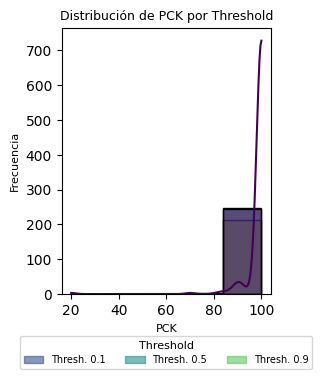

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el tamaño del gráfico en pulgadas (8x8 cm ≈ 3.15x3.15 in)
plt.figure(figsize=(3.15, 5))

# Crear el histograma
ax = sns.histplot(
    data=df,
    x='pck',
    hue='threshold',
    bins=5,
    kde=True,
    palette='viridis',
    edgecolor='black',
    alpha=0.6,
    multiple='layer'
)

# Ajustar etiquetas y título (fuentes más pequeñas para el nuevo tamaño)
plt.xlabel('PCK', fontsize=8)
plt.ylabel('Frecuencia', fontsize=8)
plt.title('Distribución de PCK por Threshold', fontsize=9)

# --- Leyenda en la parte inferior (ajustada para tamaño pequeño) ---
unique_thresholds = df['threshold'].unique()
colors = sns.color_palette('viridis', n_colors=len(unique_thresholds))
handles = [plt.Rectangle((0, 0), 1, 1, color=colors[i], alpha=0.6) for i in range(len(unique_thresholds))]
labels = [f'Thresh. {t}' for t in unique_thresholds]  # Texto abreviado para ahorrar espacio

plt.legend(
    handles,
    labels,
    title='Threshold',
    loc='lower center',
    bbox_to_anchor=(0.5, -0.3),  # Ajuste fino para gráficos pequeños
    fontsize=7,                  # Fuente más pequeña
    title_fontsize=8,            # Título de leyenda más pequeño
    ncol=len(unique_thresholds), # Leyenda en fila horizontal
)

# Ajustar márgenes para evitar cortes
plt.tight_layout(rect=[0, 0.1, 1, 0.95])  # rect=[left, bottom, right, top]
plt.show()

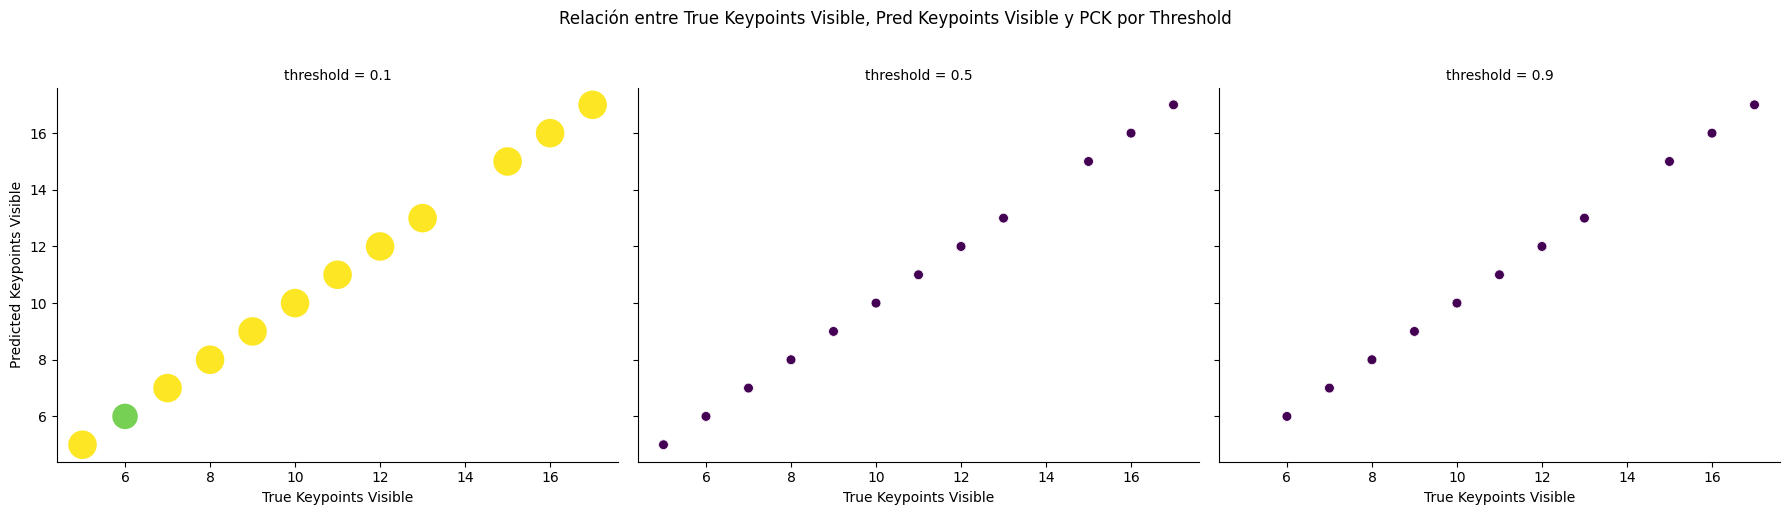

In [6]:
# Crear el gráfico de dispersión con facetas por threshold
g = sns.FacetGrid(df, col='threshold', col_wrap=3, height=5, aspect=1.2)
g.map_dataframe(
    sns.scatterplot,
    x='true_keypoints_visible',
    y='pred_keypoints_visible',
    size='pck',
    sizes=(50, 500),  # Ajusta el rango de tamaños de los puntos
    hue='pck',        # Colorear los puntos según el valor de pck
    palette='viridis' # Paleta de colores
)

# Añadir etiquetas y título
g.set_axis_labels('True Keypoints Visible', 'Predicted Keypoints Visible')
g.fig.suptitle('Relación entre True Keypoints Visible, Pred Keypoints Visible y PCK por Threshold', y=1.02)

# Ajustar el diseño y mostrar el gráfico
plt.tight_layout()
plt.show()

# Cuales son las imagenes que presentan menor valor con respecto a un umbral PCK

In [7]:
filtered_df = df[df['pck'] < 90]
print(filtered_df.to_string())

                                              nombre_imagen  threshold image_size  cantidad_true_keypoints  true_keypoints_visible  cantidad_pred_keypoints  pred_keypoints_visible        pck
30   imagen_011_jpg.rf.efc4f6570869d250cc6316a35f6b4b26.jpg        0.1    147x256                       17                      10                       17                      10  70.000000
93   imagen_033_jpg.rf.7724586b779fee811c980439acc5edcb.jpg        0.1    146x256                       17                      11                       17                      11  81.818182
189  imagen_065_jpg.rf.939388d8bd5206439fbf96ec0ef0381e.jpg        0.1    142x256                       17                      15                       17                      15  20.000000
421  imagen_151_jpg.rf.03bf7f9e27198b0298489040774a54af.jpg        0.1    144x256                       17                       9                       17                       9  88.888889
581  imagen_208_jpg.rf.5f9e8ec2fe2deeab0e9107

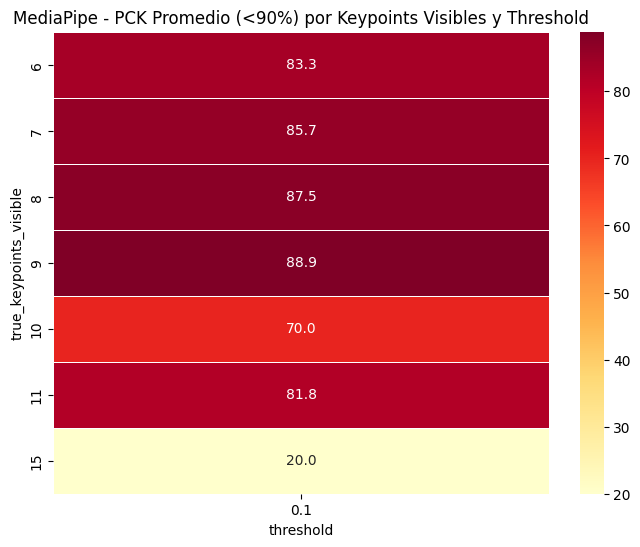

In [8]:
# Crear tabla pivote
heatmap_data = filtered_df.pivot_table(
    index="true_keypoints_visible",
    columns="threshold",
    values="pck",
    aggfunc="mean"
)

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    heatmap_data,
    annot=True,
    cmap="YlOrRd",
    fmt=".1f",
    linewidths=0.5
)
plt.title("MediaPipe - PCK Promedio (<90%) por Keypoints Visibles y Threshold")
plt.show()

In [9]:
import os
import importlib , pck, pandas as pd # Importar importlib para recargar módulos
from dotenv import load_dotenv

dotenv_path = os.path.join(os.getcwd(), '..', '.env')
importlib.reload(pck)
from pck import PCK

# Configuracion
images_path = os.path.join(os.getenv('BASE_PATH'), os.getenv('IMAGES_SUBPATH'))
labels_path = os.path.join(os.getenv('BASE_PATH'), os.getenv('LABELS_SUBPATH'))
evaluator = PCK(os.getenv('BASE_PATH'), images_path, labels_path)

I0000 00:00:1762027394.053422  137028 gl_context.cc:369] GL version: 2.1 (2.1 ATI-4.10.12), renderer: AMD Radeon Pro 5300M OpenGL Engine
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
W0000 00:00:1762027394.237931  138502 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1762027394.271559  138502 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1762027394.292215  138511 landmark_projection_calculator.cc:186] Using NORM_RECT without IMAGE_DIMENSIONS is only supported for the square ROI. Provide IMAGE_DIMENSIONS or use PROJECTION_MATRIX.
I0000 00:00:1762027394.312508  137028 gl_context.cc:369] GL version: 2.1 (2.1 ATI-4.10.12), renderer: AMD Radeon Pro 5300M OpenGL Engine
W0000 00:00:1762027394.508264  138518 inference_feedback_manager.cc:114] Feedback manager requires 

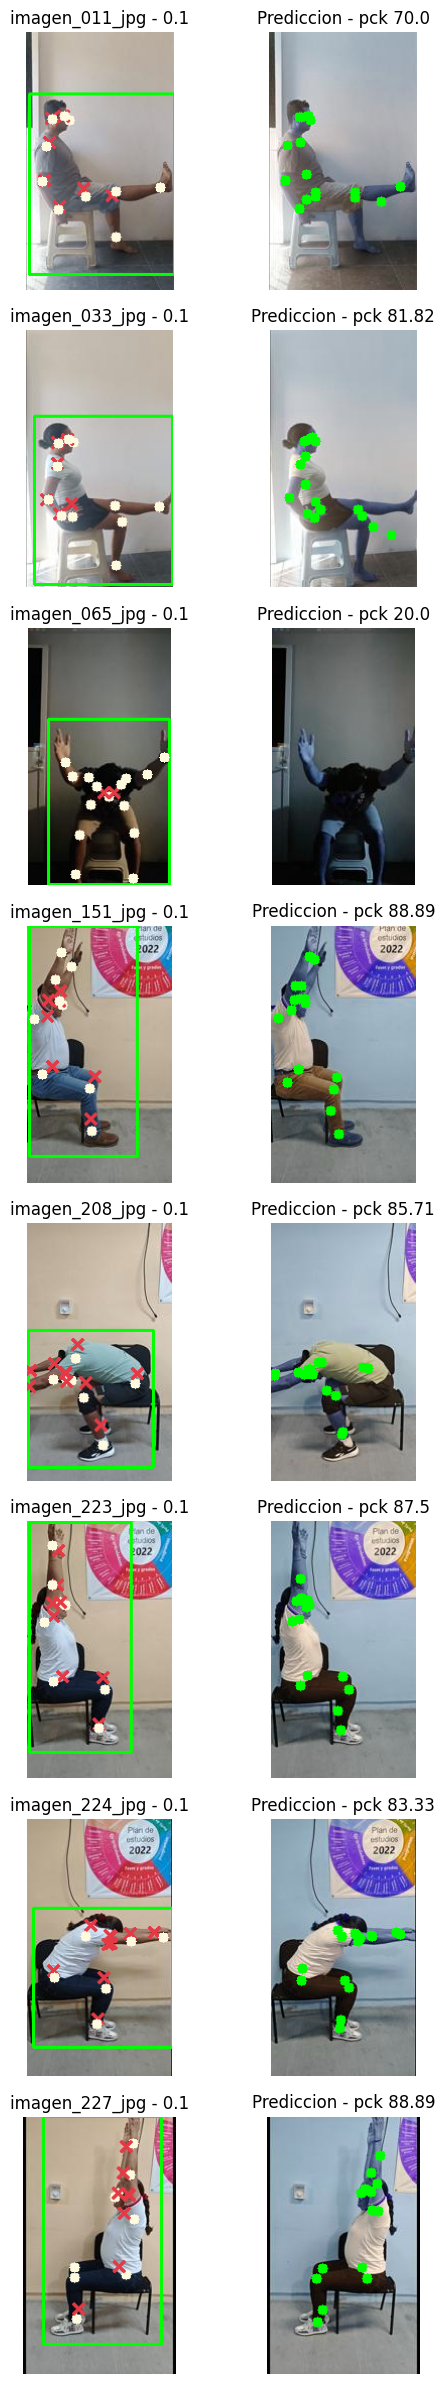

In [10]:
import re
import matplotlib.pyplot as plt

num_rows = len(filtered_df)
fig, axes = plt.subplots(num_rows, 2, figsize=(6, 3 * num_rows))

# Configurar el tamaño de fuente global para todos los elementos del gráfico
plt.rcParams.update({
    'font.size': 12,          # Tamaño de fuente base
    'axes.titlesize': 12,     # Tamaño de fuente para títulos
    'axes.labelsize': 12,     # Tamaño de fuente para etiquetas de ejes
    'xtick.labelsize': 12,    # Tamaño de fuente para etiquetas del eje x
    'ytick.labelsize': 12     # Tamaño de fuente para etiquetas del eje y
})

for i, (index, row) in enumerate(filtered_df.iterrows()):
    # Obtener las rutas de la imagen y la etiqueta
    image_path = os.path.join(images_path, row['nombre_imagen'])
    label_path = os.path.join(labels_path, os.path.splitext(row['nombre_imagen'])[0] + '.txt')

    # Dibujar keypoints originales y predichos
    img_with_original_keypoints = evaluator.draw_original_keypoints(image_path, label_path)
    img_with_predicted_keypoints, inference_results = evaluator.draw_predicted_keypoints(image_path, label_path)

    # extraer todo lo que esta antes de '.rf'
    match = re.match(r"^(.*?)(_jpg)\.rf\.", row['nombre_imagen'])
    image_name = match.group(1) + match.group(2) if match else 'Not found'

    # Mostrar la imagen con etiquetas originales
    axes[i, 0].imshow(img_with_original_keypoints)
    axes[i, 0].set_title(f'{image_name} - {row["threshold"]}', fontsize=12)  # Tamaño de fuente específico para título
    axes[i, 0].axis('off')

    # Mostrar la imagen con etiquetas predichas
    axes[i, 1].imshow(img_with_predicted_keypoints)
    axes[i, 1].set_title(f'Prediccion - pck {round(row["pck"],2)}', fontsize=12)  # Tamaño de fuente específico para título
    axes[i, 1].axis('off')

# Ajustar el espacio entre subplots
plt.tight_layout()

# Mostrar la figura
plt.show()

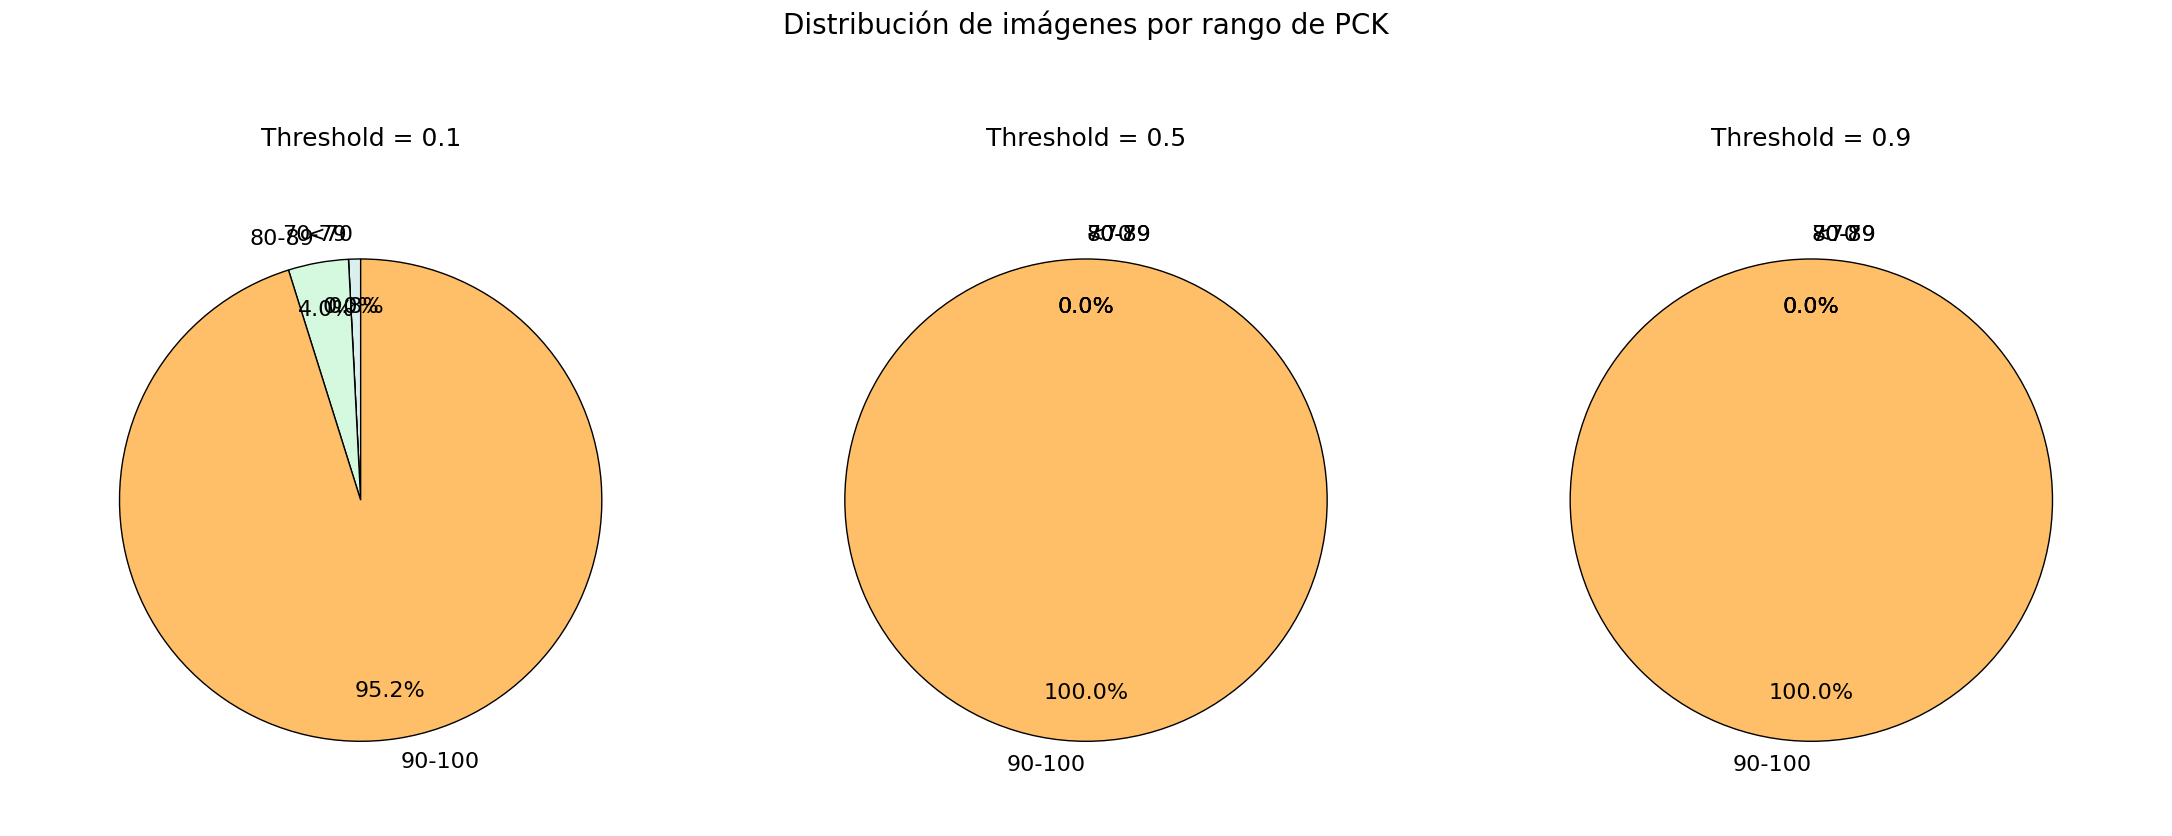

In [11]:
# Configuración de estilos y tamaños de fuente
plt.rcParams.update({
    'font.size': 16,          # Tamaño de fuente general
    'axes.titlesize': 18,     # Tamaño de título de cada subplot
    'figure.titlesize': 20    # Tamaño del título principal
})

# Definir los rangos y etiquetas
bins = [0, 70, 80, 90, 100]
labels = ['<70', '70-79', '80-89', '90-100']

# Crear una figura con subplots para cada threshold
fig, axes = plt.subplots(1, 3, figsize=(22, 8))
fig.suptitle('Distribución de imágenes por rango de PCK', y=1.05)

# Colores personalizados para consistencia
colors = ['#DAF0EE', '#B3C5D7', '#D5F9DE', '#FFBF69']
wedge_props = {'edgecolor': 'black', 'linewidth': 1}

# Iterar por cada threshold
for i, threshold in enumerate([0.1, 0.5, 0.9]):
    # Filtrar y categorizar datos
    df_threshold = df[df['threshold'] == threshold].copy()
    df_threshold['pck_category'] = pd.cut(df_threshold['pck'], bins=bins, labels=labels)
    counts = df_threshold['pck_category'].value_counts().sort_index()
    
    # Crear pie chart
    axes[i].pie(
        counts,
        labels=labels,
        autopct='%1.1f%%',
        startangle=90,
        colors=colors,
        wedgeprops=wedge_props,
        textprops={'fontsize': 16},  # Tamaño de fuente para porcentajes
        pctdistance=0.8               # Ajustar posición de porcentajes
    )
    
    axes[i].set_title(f'Threshold = {threshold}', pad=20)
    axes[i].axis('equal')

# Ajustar layout y mostrar
plt.tight_layout()
plt.show()

In [12]:
ap_stats = df.groupby('threshold')['pck'].describe()
print(ap_stats.to_string())

           count        mean       std    min    25%    50%    75%    max
threshold                                                                
0.1        248.0   98.829255  6.050245   20.0  100.0  100.0  100.0  100.0
0.5        248.0  100.000000  0.000000  100.0  100.0  100.0  100.0  100.0
0.9        212.0  100.000000  0.000000  100.0  100.0  100.0  100.0  100.0


# Inferencia de una sola imagen

I0000 00:00:1762028769.629662  137028 gl_context.cc:369] GL version: 2.1 (2.1 ATI-4.10.12), renderer: AMD Radeon Pro 5300M OpenGL Engine
W0000 00:00:1762028769.794705  144017 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1762028769.822912  144017 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


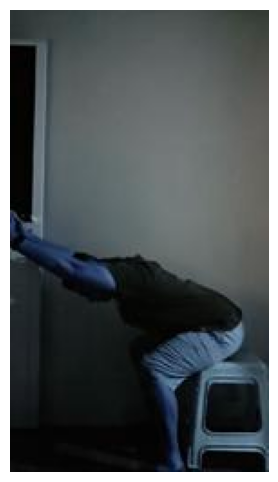

In [13]:
image_name = 'imagen_070_jpg.rf.60568a1aaf63e10d83beb3cee8603b0a.jpg'
image_path = os.path.join(images_path, image_name)
label_path = os.path.join(labels_path, os.path.splitext(image_name)[0] + '.txt')

img_with_predicted_keypoints, inference_results = evaluator.draw_predicted_keypoints(image_path, label_path)
plt.figure(figsize=(10, 6))
plt.imshow(img_with_predicted_keypoints)
plt.axis('off')
plt.show()